In [2]:
import scipy as sc
import numpy as np
import pandas as pd

data = pd.read_csv("credit.csv", sep=",", header = 0) 
data[:10]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,0,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,0,0,0,0,...,0,13007,13912,0,0,0,13007,1122,0,0


In [3]:
reliable = data[data.default == 0]
unreliable = data[data.default == 1]
reliable[:10]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,0,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,0,0,0,0,...,0,13007,13912,0,0,0,13007,1122,0,0
10,11,200000,2,3,2,34,0,0,2,0,...,2513,1828,3731,2306,12,50,300,3738,66,0
11,12,260000,2,1,2,51,0,0,0,0,...,8517,22287,13668,21818,9966,8583,22301,0,3640,0


Задание 1. Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0)
и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного
лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих
непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической 
точки зрения ?

для начала посмотрим на гистограммы которые отображают как часто возвращают/не возвращают кредиты в зависимости от казмера кредита

Populating the interactive namespace from numpy and matplotlib


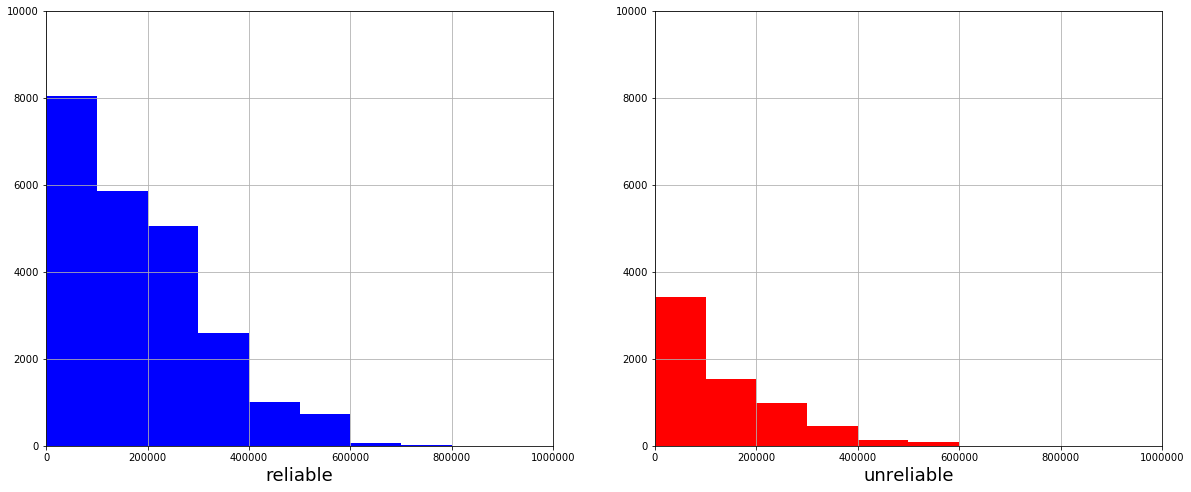

In [28]:
import matplotlib.pyplot as plt
%pylab inline
plt.figure(figsize(20,8))
bin_size = 100000; min_edge = 0; max_edge = 1000000
N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(reliable['LIMIT_BAL'], bins = bin_list, color = 'b')
pylab.xlabel('reliable', fontsize=18)
pylab.xlim([0,1000000])
pylab.ylim([0,10000])

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(unreliable['LIMIT_BAL'], bins = bin_list, color = 'r')
pylab.xlabel('unreliable', fontsize=18)
pylab.xlim([0,1000000])
pylab.ylim([0,10000])

pylab.show()

Из графиков видно что распределения не имеют нормальную форму, а также видно что люди чаще возвращают кредит.

1а. гипотеза о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки
Ранговый критерий Манна-Уитни не подходит из за частого повторения одинаковы данных
поэтому будем пользоваться бутстрепом

In [15]:
from scipy import stats
rel_lim = data[data.default == 0].LIMIT_BAL.values
unrel_lim = data[data.default == 1].LIMIT_BAL.values
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries
def bootstrap_confint(data, alpha):
    return np.percentile(data, [100*(alpha/2),100*(1-alpha/2)])

np.random.seed(0)
reliable_sample = map(np.median, get_bootstrap_samples(rel_lim, 1000))
unreliable_sample = map(np.median, get_bootstrap_samples(unrel_lim, 1000))

In [4]:
print "95% confidence interval for reliable:",  bootstrap_confint(reliable_sample, 0.05)
print "95% confidence interval for unreliable",  bootstrap_confint(unreliable_sample, 0.05)

delta_median_scores = map(lambda x: x[1] - x[0], zip(reliable_sample, unreliable_sample))
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for reliable: [ 150000.  150000.]
95% confidence interval for unreliable [ 80000.  90000.]
95% confidence interval for the difference between medians [-70000. -60000.]


Вывод: как видим интервалы не пересекаются и интервальная разница не содержит нуля => медианные значения не равны

1б. проверьте гипотезу о равенстве распределений с помощью одного из подходящих непараметрических критериев 
проверки равенства средних.
будем использовать перестановочный критерий для независимых выборок
Нулевая гипотиза: полное равенство распределений в двух выборках(функции распределения одинаковы), 
проверяется она против альтернативы сдвига, достигаемый уровень значимости 0.05

используем перестановочный критерий потому что в отличие от ранговых критериев,
нормальных аппроксимаций для нулевого распределения в случае больших выборок не существует, поэтому
единственный способ оценить нулевое распределение статистики — это перебрать много перестановок.

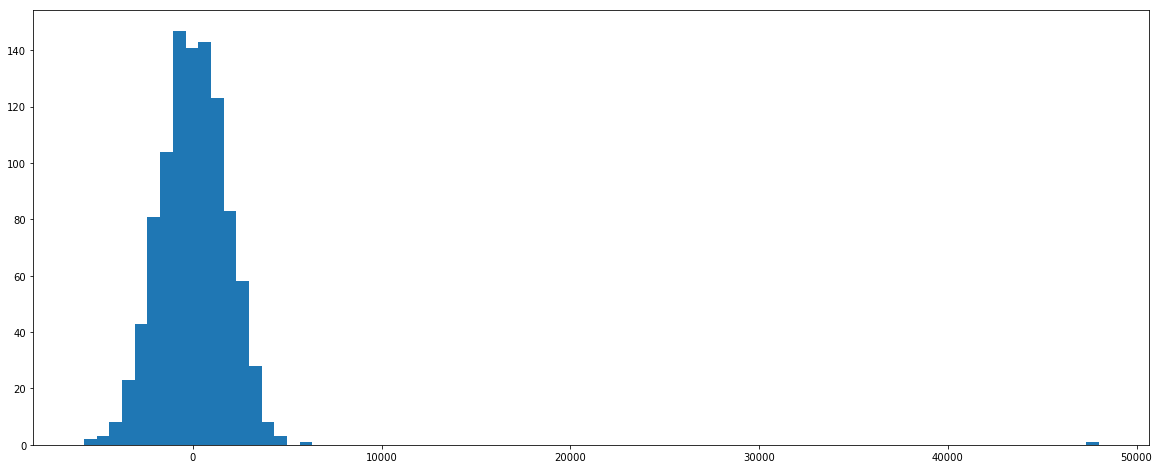

In [16]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)
def get_random_combinations(n1, n2, max_combinations):
    index = range(n1 + n2)
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr
random.seed(0)
pylab.hist(permutation_zero_dist_ind(rel_lim, unrel_lim, max_combinations = 1000), bins = 80)
pylab.show()

Выведем гистограмму нулевого распределения, как видим пик приходит в ноль и распределение похоже на 
нормальное(если не учитывать данные которые находятся отдельно от горба распределения)

Запустим перестановочный критерий

In [7]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)
print "p-value: %f" % permutation_test(rel_lim, unrel_lim, max_permutations = 1000)

p-value: 0.001000


Вывод: как видим на уровне 0,05 гипотеза отвергается => распределения не равны

Задание 2. Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит
отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного
интервала и подходящего статистического критерия) (доверительный интервал для 2х долей, биномиальный 
критерий для доли (задача бонда))

Для начала посмотрим на гистограммы которые отображают кто чаще мужчины(синий цвет) или 
женщины(розовый), возвращают(более яркий цвет)/не возвращают кредиты 

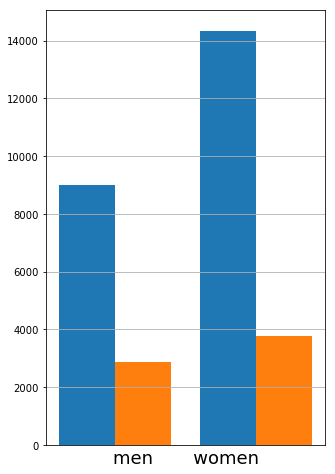

In [388]:
plt.figure(figsize(5,8))
plt.xticks([])
pylab.grid()
pylab.hist((reliable['SEX'], unreliable['SEX']), bins = 2)
pylab.xlabel('men       women', fontsize=18)

pylab.show()

Построим доверительный интервал для 2х долей

In [391]:
import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint
men = data[data.SEX == 1]
women = data[data.SEX == 2]
mendef = men.default.values
womendef = women.default.values
conf_interval_men = proportion_confint(sum(mendef),len(mendef),method = 'wilson')
conf_interval_women = proportion_confint(sum(womendef), len(womendef),method = 'wilson')
print 'interval for men [%f, %f]' % conf_interval_men
print 'interval for women [%f, %f]' % conf_interval_women

interval for men [0.234061, 0.249450]
interval for women [0.201917, 0.213733]


Как видим доверительные интревалы не пересекаются из чего можно сделать вывод что гендерный состав 
группы людей вернувших и не вернувших кредит отличается

проверим это другим способом, посторим Доверительный интервал для разности долей (независимые выборки)

In [121]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

print "confidence interval: [%f, %f]" % proportions_confint_diff_ind(mendef, womendef)

confidence interval: [0.024207, 0.043612]


по результату видно что доверительный интервал не содержит нуля => гендерный состав группы людей вернувших и не вернувших кредит отличается

Задание 3. Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг.
Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек 
вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга",
где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы 
предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в 
интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст  
долг ? наоборт, не отдаст долг ? 

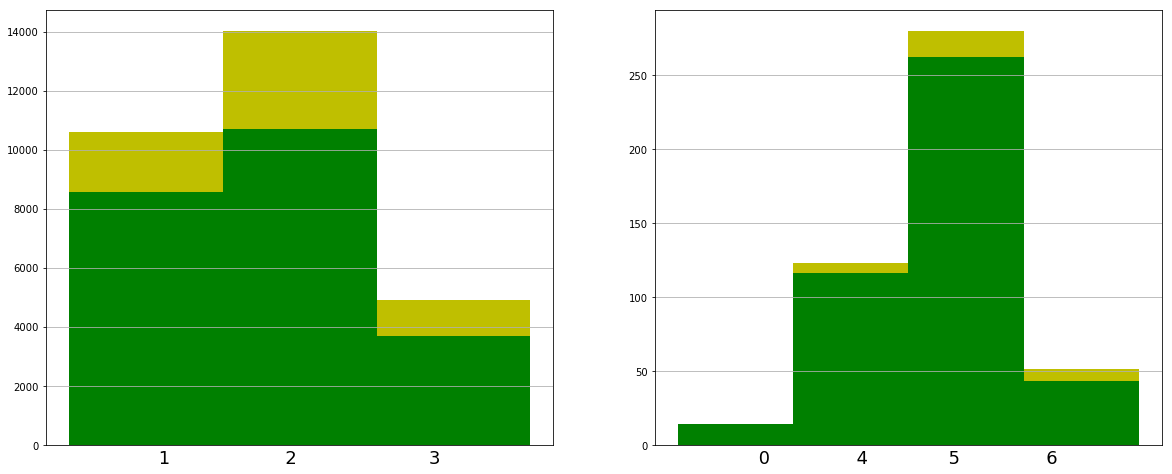

In [7]:
l1 = [1,2,3]
l2 = [0,4,5,6]
plt.figure(figsize(20,8))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(map(lambda i : data['EDUCATION'][data.EDUCATION == i], l1), bins = 1, color = ('y', 'y', 'y'))
pylab.hist(map(lambda i : data['EDUCATION'][data.EDUCATION == i][data.default == 0], l1), bins = 1, color = ('g', 'g', 'g'))
pylab.xlabel(' 1                    2                       3 ', fontsize=18)
plt.xticks([])

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(map(lambda i : data['EDUCATION'][data.EDUCATION == i], l2), bins = 1, color = ('y', 'y', 'y', 'y'))
pylab.hist(map(lambda i : data['EDUCATION'][data.EDUCATION == i][data.default == 0], l2), bins = 1, color = ('g', 'g', 'g','g'))
pylab.xlabel(' 0               4              5               6 ', fontsize=18)
plt.xticks([])

pylab.show()

На гистограмах желтым цветом столбцы с полным количеством людей с определенным образованием, а поверх них 
наложены зеленые столбцы которые отображают количество возвращенных кредитов

Проверим теперь нулевую гипотезу что величыты независимы, против гипотезы что все таки зависимость есть

In [16]:
def categories(series):
    return range(int(series.min()), int(series.max()) + 1)
def chi_square_of_df_cols(df, col1, col2):
    df_col1, df_col2 = df[col1], df[col2]

    result = [[sum((df_col1 == cat1) & (df_col2 == cat2))
               for cat2 in categories(df_col2)]
              for cat1 in categories(df_col1)]
    return stats.chi2_contingency(result)
g, p, dof, expctd = chi_square_of_df_cols(data, 'EDUCATION', 'default')
print p

1.23326262454e-32


p-value очень мало из чего можно делать вывод в пользу альтернативной гипотезы что величины зависимы

Составим таблицу сопряженности (contingency_table, confusion_matrix) "образование" на "возврат долга"

In [5]:
edu_contingency_table = pd.pivot_table(data, index='EDUCATION', values="LIMIT_BAL", columns='default', aggfunc = len, fill_value=0)
edu_contingency_table

default,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


Составим таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек

In [24]:
chi2, p, dof, predict  = stats.chi2_contingency(edu_contingency_table)
delta_edu = edu_contingency_table - predict
delta_edu.columns = ['rel', 'no_rel']
print delta_edu

                rel    no_rel
EDUCATION                    
0            3.0968   -3.0968
1          305.4020 -305.4020
2         -226.5640  226.5640
3         -149.3596  149.3596
4           20.2076  -20.2076
5           43.9360  -43.9360
6            3.2812   -3.2812


Приведем к более интерпретируемому виду и посмотрим на отношение разности к ожидаемым значениям

In [26]:
delta_edu2 = (edu_contingency_table - predict) /predict
delta_edu2.columns = ['rel', 'no_rel']
print delta_edu2

                rel    no_rel
EDUCATION                    
0          0.284027 -1.000000
1          0.037047 -0.130436
2         -0.020735  0.073004
3         -0.039004  0.137324
4          0.210952 -0.742719
5          0.201482 -0.709377
6          0.082611 -0.290856


Найдем отношение вернувших к невернувшим в ависимости от ученой степени 

In [297]:
l = np.zeros(7)
for i in range(len(rct)):
    l[i] = round((rct[i][0] - rct[i][1])/float(rct[i][0])*100, 2)
print l

[ 100.     76.18   68.88   66.39   93.97   93.13   81.4 ]


Как видим 100 прцентов возврацают доктора, а реже всего те кто получил начальное образование.

Задание 4. Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: 
нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

Посмотрим в какой части данных отсутствует информация о браке (значения 0, 3).

In [305]:
print  (len(data[data.MARRIAGE == 0]) + len(data[data.MARRIAGE == 3]))/float((len(data)))*100

1.25666666667


Как видим 1.26 % только имеют неопределенные значения, можем пренебречь в качесте меры будем использовать Корреляция Мэтьюса для 2х биномиальных переменных.

Постомтрим на гистаграму где синим показанно количество вернувших кредит, а желтым - невернувших.

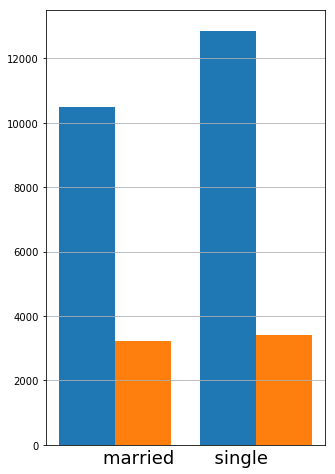

In [29]:
plt.figure(figsize(5,8))
plt.xticks([])
pylab.grid()
pylab.hist((reliable['MARRIAGE'], unreliable['MARRIAGE']), bins = 2)
pylab.xlabel('married       single', fontsize=18)

pylab.show()

Выведем значение Корреляции Мэтьюса

In [30]:
a = len(data[data.MARRIAGE == 1][data.default == 0])
b = len(data[data.MARRIAGE == 1][data.default == 1])
c = len(data[data.MARRIAGE == 2][data.default == 0])
d = len(data[data.MARRIAGE == 2][data.default == 1])
m = (a*d-b*c)/sqrt((a+b)*(a+c)*(b+d)*(c+d))
print m

-0.0305553699204


/home/danylo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/danylo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/home/danylo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/danylo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


По результату сделаем вывод что это абсолютно независимые признаки

Вернемся к полному набору данных и испльзуем критерий Крамера

In [32]:
marr_pvt = data.pivot_table(index='default', values="LIMIT_BAL", columns='MARRIAGE', aggfunc = len, fill_value=0)
def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))
print cramers_stat(marr_pvt.as_matrix())

0.0344782036628


0 означает отсутсвие свзяи, 1 - полную связь. Из чего сделаем вывод что связи нет.

In [33]:
##chi2, p, dof, predict  = stats.chi2_contingency(marr_pvt)
##print p

8.82586245758e-08


# Нулевая гипотеза о том, что семейное положение не вляет на возврат кредита отвергается на уровне значимости 0.05

Задание 5. Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы:
a) о равенстве медианных значений возрастов людей 
b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства
средних. Значимы ли полученные результаты с практической точки зрения ?

Посмотрим на гистограмму зависимости возраста к количеству возвращенных и не возвращенных кредитов 

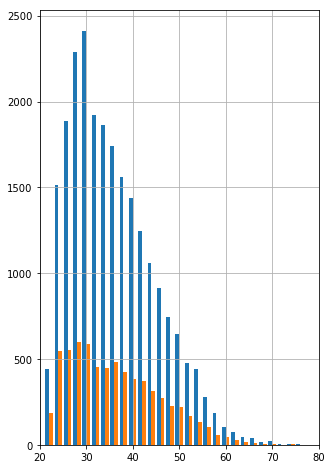

In [41]:
plt.figure(figsize(5,8))
pylab.grid()
pylab.hist((reliable['AGE'], unreliable['AGE'] ), bins = 29)
pylab.xlim([20,80])

pylab.show()

Как видно из графика распределения не имеют нормальную форма => будем применять непараметрические критерии
будем использовать критерий Манна-Уитни, нулевая гипотеза, что распределения равны, против алтернативной гипотезы 
что между распределниями есть сдвиг

In [34]:
stats.mannwhitneyu(reliable['AGE'].values, unreliable['AGE'].values)

MannwhitneyuResult(statistic=76966879.5, pvalue=0.18625177174493079)

Как видим p-value меньше 0,05 => средние значения признаков в выборках различаются и распределения имеют смещение
попробуем проверить гипотезу двухвыборочного перестановочного критерия для несвязанных выборок
нулевая гипотеза, что распределения равны, против алтернативной гипотезы что между распределниями есть сдвиг

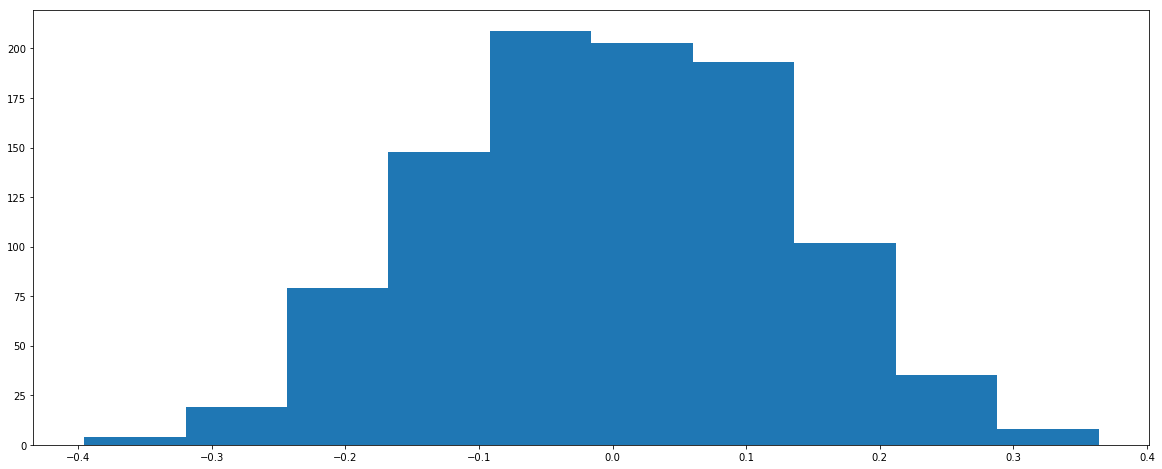

p-value: 0.014400


In [5]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)
def get_random_combinations(n1, n2, max_combinations):
    index = range(n1 + n2)
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr
pylab.hist(permutation_zero_dist_ind(reliable['AGE'].values, unreliable['AGE'].values, max_combinations = 1000))
pylab.show()
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)
print "p-value: %f" % permutation_test(reliable['AGE'].values, unreliable['AGE'].values, max_permutations = 5000)

Выведенно нулевое распределение статистики критерия Манна-Уитни, (имеет нормальное распределение)

Как видим p-value меньше 0,05 => средние значения признаков в выборках различаются и распределения имеют смещение

Посторим доверительные интервалы для медиан возрастов тех кто вернул и не вернул кредит, а также посмотрим на интервал разницы медиан 

In [36]:
age_ret_median = map(np.median, get_bootstrap_samples(reliable['AGE'].values, 1000))
age_not_median = map(np.median, get_bootstrap_samples(unreliable['AGE'].values, 1000))
print '95% доверительный интервал вернувших кредит', bootstrap_confint(age_ret_median, 0.05)
print '95% доверительный интервал не вернувших кредит', bootstrap_confint(age_not_median, 0.05)
delta_age_score = map(lambda x: x[1] - x[0], zip(age_ret_median, age_not_median))
print "95% confidence interval for the difference between medians",  stat_intervals(delta_age_score, 0.05)

95% доверительный интервал вернувших кредит [ 34.  34.]
95% доверительный интервал не вернувших кредит [ 34.  35.]
95% confidence interval for the difference between medians [ 0.  1.]


Видно что интервал разницы содержит ноль, что как бы намекает что нельзя отбросить гипотезу о том что медианы совпадают.
Из 2х проверенных критериев я больше склоняюсь к результатам бутстрепа.

Попробуем оценить практическую значимость возраста.

In [23]:
stats.binom_test(len(reliable),len(data), p = 0.5, alternative = 'two-sided')

4.9406564584124654e-324

Уровень практической значимости незначителен